# <b>PROJECT: HOLIDAY WEATHER
    
Taking holidays is one way I love to enjoy my alone time, travel see new people, etc. In this project I am going to use the historic weather data from the Weather Underground for Brazil to try to predict two good weather weeks to take off as holiday to Brazilia. Of course the weather in the summer of 2016 may be very different to 2014 but it should give some indication of when would be a good time to take a summer break.
    
## <b>Data Source
My data source is <a>"https://www.wunderground.com/history"</a>
Weather Underground keeps historical weather data collected in many airports around the world.     


In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
brasilia = pd.read_csv('Brasilia_BSB_2014.csv', skipinitialspace=True)

In [2]:
brasilia.head(3)

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,31,24,17,19,18,16,94,64,33,...,19,11,10,14,5,NaN,0.0,3.0,Thunderstorm,125<br />
1,2014-1-2,30,23,17,19,17,14,94,65,33,...,19,12,10,16,5,NaN,0.0,2.0,NaN,102<br />
2,2014-1-3,32,24,18,20,15,11,88,55,19,...,19,13,10,19,6,NaN,0.0,2.0,NaN,133<br />


### Cleaning The Data

In [3]:
#To remove the html tag in WindDirDegrees

brasilia = brasilia.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

In [4]:
#To remove the html tag in the column WindDirDegrees

brasilia['WindDirDegrees'] = brasilia['WindDirDegrees'].str.rstrip('<br />') 

In [5]:
#I noticed some of the entries are NaN - not a number especially in the events column. I want to find and fill them

brasilia[brasilia['Events'].isnull()]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
1,2014-1-2,30,23,17,19,17,14,94,65,33,...,19,12,10,16,5,NaN,0.0,2.0,NaN,102
2,2014-1-3,32,24,18,20,15,11,88,55,19,...,19,13,10,19,6,NaN,0.0,2.0,NaN,133
3,2014-1-4,32,25,18,17,13,8,77,47,16,...,19,12,10,24,6,NaN,0.0,2.0,NaN,106
7,2014-1-8,29,22,15,15,13,10,88,55,22,...,19,12,10,19,8,NaN,0.0,2.0,NaN,115
8,2014-1-9,29,24,18,16,13,10,73,50,29,...,19,11,10,21,8,NaN,0.0,3.0,NaN,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,2014-11-21,31,25,19,18,14,12,68,50,22,...,19,12,10,21,10,NaN,0.0,5.0,NaN,112
336,2014-12-3,28,23,19,18,16,12,88,63,37,...,19,11,10,21,8,NaN,0.0,4.0,NaN,89
353,2014-12-20,28,23,19,19,18,17,83,71,45,...,19,11,10,26,10,NaN,0.0,4.0,NaN,358
360,2014-12-27,29,25,21,17,14,12,73,52,23,...,19,13,10,32,14,NaN,0.0,3.0,NaN,101


In [6]:
brasilia = brasilia[brasilia['Max Gust SpeedKm/h'].isnull()]

In [7]:
brasilia['Events'] = brasilia['Events'].fillna('')
brasilia[brasilia['Events'].isnull()]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees


In [8]:
brasilia['Max Gust SpeedKm/h'] = brasilia['Max Gust SpeedKm/h'].fillna('')
brasilia[brasilia['Max Gust SpeedKm/h'].isnull()]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees


In [9]:
#Now, to see and fix the data types 

brasilia.dtypes

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h             object
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

In [10]:
#From the data above, WindDirDegrees has the datatype object. Caused by the html tag. To fix that;

brasilia['WindDirDegrees'] = brasilia['WindDirDegrees'].astype('int64') 

In [11]:
#The Date column also has a datatype of objects ie strings instead of date.
#To fix that I'll convert it to a date and also use it as the index


brasilia['Date'] = pd.to_datetime(brasilia['Date'], format='%Y-%m-%d')


In [12]:
brasilia.index = brasilia['Date']

In [13]:
brasilia = brasilia.sort_index()

In [14]:
brasilia.dtypes

Date                          datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                    object
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

In [15]:
brasilia.head(2)

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,31,24,17,19,18,16,94,64,33,...,19,11,10,14,5,,0.0,3.0,Thunderstorm,125
2014-01-02,2014-01-02,30,23,17,19,17,14,94,65,33,...,19,12,10,16,5,,0.0,2.0,,102


## <b>Visualising The Data

In [16]:
%matplotlib inline

In [17]:
brasilia[brasilia['Mean TemperatureC'] <= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,31,24,17,19,18,16,94,64,33,...,19,11,10,14,5,,0.00,3.0,Thunderstorm,125
2014-01-02,2014-01-02,30,23,17,19,17,14,94,65,33,...,19,12,10,16,5,,0.00,2.0,,102
2014-01-03,2014-01-03,32,24,18,20,15,11,88,55,19,...,19,13,10,19,6,,0.00,2.0,,133
2014-01-04,2014-01-04,32,25,18,17,13,8,77,47,16,...,19,12,10,24,6,,0.00,2.0,,106
2014-01-05,2014-01-05,30,24,19,16,13,9,83,48,23,...,19,12,10,24,8,,0.00,3.0,Rain,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-25,2014-12-25,30,25,20,19,16,13,88,58,24,...,19,12,10,24,8,,0.00,4.0,Thunderstorm,110
2014-12-26,2014-12-26,30,24,19,18,17,15,78,57,33,...,19,12,10,26,11,,0.00,3.0,Thunderstorm,109
2014-12-27,2014-12-27,29,25,21,17,14,12,73,52,23,...,19,13,10,32,14,,0.00,3.0,,101


<AxesSubplot:xlabel='Date'>

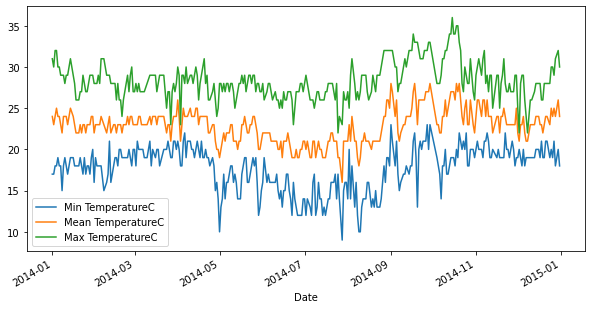

In [18]:
brasilia[['Min TemperatureC', 'Mean TemperatureC', 'Max TemperatureC']].plot(grid=False, figsize=(10, 5))

##### <i>Insights
From my graph above, it shows that Brazilia seems to be a warm temperate all year round. Which is a good vacation weather. Their mean temperature revolves around 25 degrees. However, from the graph, it can been seen that between May to September, the temperature is a bit lower. Since their weather is particularly hot and dry, I am looking for relatively cool weather and low humidity.

Lets take a look at their humidity and a closer look at the temperature bewteen May to September. Before then, lets look the the different humidities and max wind speed during the year

<AxesSubplot:xlabel='Date'>

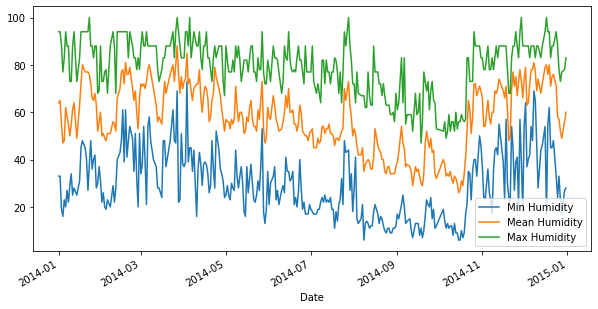

In [19]:
brasilia[['Min Humidity', 'Mean Humidity', 'Max Humidity']].plot(grid=False, figsize=(10, 5))

<AxesSubplot:xlabel='Date'>

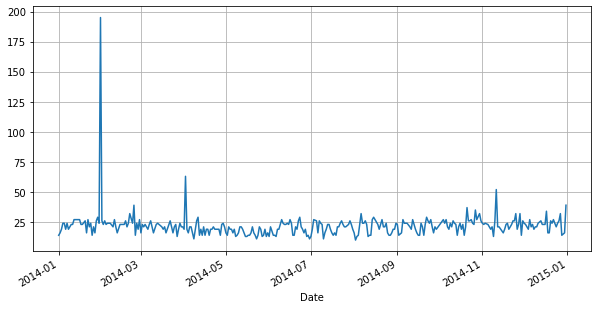

In [20]:
brasilia['Max Wind SpeedKm/h'].plot(grid=True, figsize=(10,5))

<AxesSubplot:xlabel='Date'>

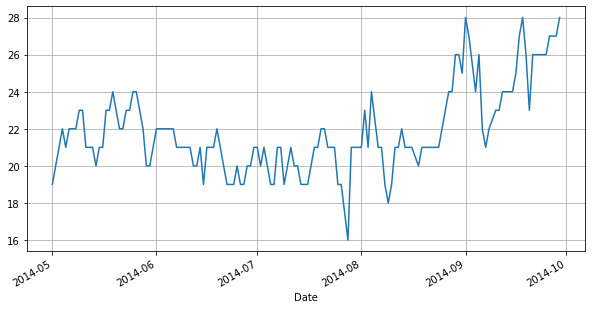

In [24]:
vaca_time = brasilia['2014-5-1':'2014-9-30']
vaca_time['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

# Conclusion: 

In conclusion, I would recommend the first two weeks of July to anyone wanting to go to Brazil for a vacation. During this time, from my plot above, they have a cooler temperature with normal wind speed.

Although due to climate change, the weather report of Brazil in 2014 may vary from the report in 2021 but If you want to go to Brazil during their cool temperatures, end of June to July 3rd week will be a good time to plan for from my analysis.
